<a href="https://colab.research.google.com/github/innovinitylabs/learning-pytorch/blob/main/01_pytorch_workflow_codealong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.1.0'

# device agnostic code

In [22]:
device = 'mps' if torch.backends.mps.is_available() else ('cuda' if torch.cuda.is_available() else 'cpu')
device # Mps = metal performance shaders on Apple M1 chip

'mps'

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.7
bias = 0.3

start = 0 
end = 1 
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)

X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [24]:
y = weight * X + bias

In [25]:
split_train = int(0.8 * len(X))

X_train, y_train = X[:split_train], y[:split_train]
X_test, y_test = X[split_train:], y[split_train:]

In [26]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [27]:
X_test[:5], y_test[:5]

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160]]))

plotting data

In [49]:
def plot_it(X_train=X_train, y_train=y_train,
            X_test=X_test, y_test=y_test,
            y_pred=None):
    plt.figure(figsize=(10,7))

    plt.scatter(X_train, y_train, s=4, c='g', label='Train Data')

    plt.scatter(X_test, y_test, s=3, c='y', label='Test Data')



    if y_pred is not None:
        plt.scatter(X_test, y_pred, s=10, c='y', label='Predictions')

    plt.legend(prop={'size': 11})

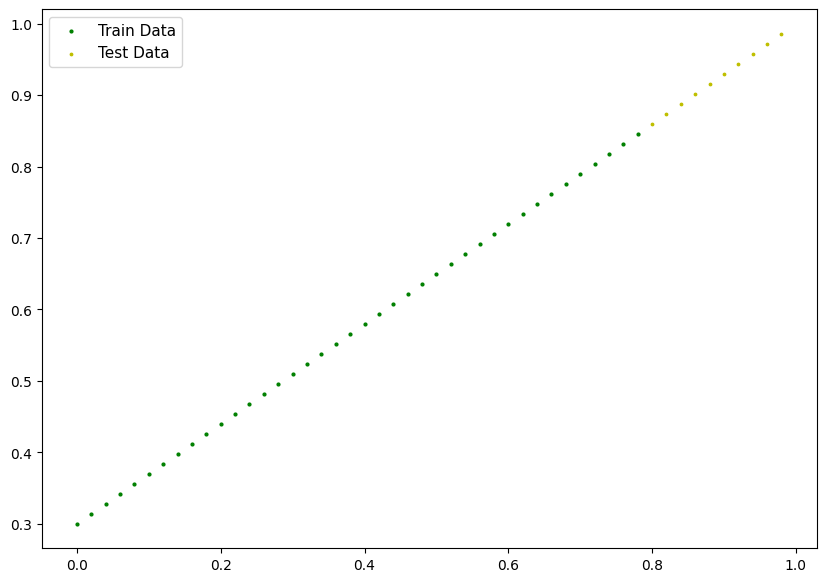

In [50]:
plot_it()

creating model

In [51]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()

        self.linearlayer = nn.Linear(in_features=1,
                                     out_features=1)

    def forward(self, x):
        return self.linearlayer(x)

In [52]:
torch.manual_seed = 42

model = LinearRegression()

In [53]:
model

LinearRegression(
  (linearlayer): Linear(in_features=1, out_features=1, bias=True)
)

In [55]:
list(model.parameters())

[Parameter containing:
 tensor([[0.8012]], requires_grad=True),
 Parameter containing:
 tensor([0.6475], requires_grad=True)]